In [3]:
# module load python
# module load ffmpeg
# pip install --user pydub
import pandas as pd
import glob, os, pickle

base_path='/project/graziul/data/'

In [21]:
zones = ['Zone 1', 'Zone 2','Zone 3', 'Zone 4', 'Zone 5','Zone 6','Zone 8','Zone 10','Zone 11','Zone 12','Zone 13']

In [22]:
# Load VAD frequency data from dictionaries (will be from PostgreSQL database soon)
zone_date_vad_list = []
for zone in zones:
    date_path = base_path+zone.replace(' ','')+'/'
    dates = [i.split('/')[-1] for i in glob.glob(date_path+'*') if '20' in i]
    dates.sort()
    for date in dates:
        dict_temp = pickle.load(open(base_path+zone.replace(' ','')+'/'+date+'/'+date+'vad_dict.pkl','rb'))
        vad_freq_dict = {k:len(dict_temp[k]['pydub'][-24]['nonsilent_slices']) for k in dict_temp.keys() if '20' in k}
        for file in vad_freq_dict:
            zone_date_vad_list.append([zone, date, file.split('-')[0], vad_freq_dict[file]])

In [24]:
df = pd.DataFrame(zone_date_vad_list, columns=['zone','date','file','num_bpc'])
df = df.sort_values(['zone','file'])
df

,zone,date,file,num_bpc
0,Zone 1,2018_08_04,201808040607,35
1,Zone 1,2018_08_04,201808040636,79
2,Zone 1,2018_08_04,201808040706,83
3,Zone 1,2018_08_04,201808040736,264
4,Zone 1,2018_08_04,201808040806,100
...,...,...,...,...
94174,Zone 8,2019_07_31,201907312105,521
94175,Zone 8,2019_07_31,201907312135,408
94176,Zone 8,2019_07_31,201907312205,406
94177,Zone 8,2019_07_31,201907312235,367


In [45]:
df.to_csv('/project/graziul/bpc_freq.csv',index=False)

In [26]:
df['zone'].unique()

array(['Zone 1', 'Zone 10', 'Zone 11', 'Zone 12', 'Zone 13', 'Zone 2',
       'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 8'], dtype=object)

zone
Zone 1     [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 10    [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 11    [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 12    [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 13    [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 2     [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 3     [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 4     [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 5     [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 6     [AxesSubplot(0.125,0.2;0.775x0.68)]
Zone 8     [AxesSubplot(0.125,0.2;0.775x0.68)]
dtype: object

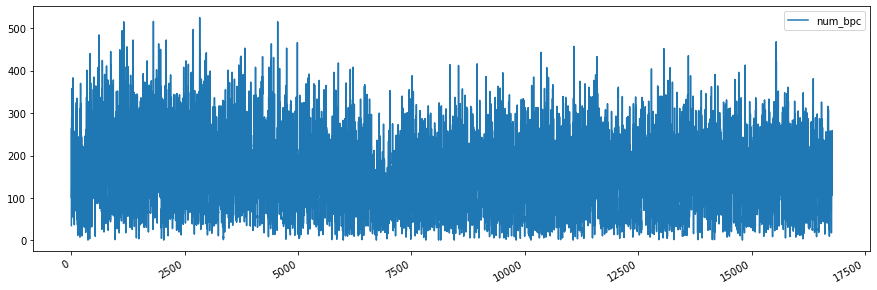

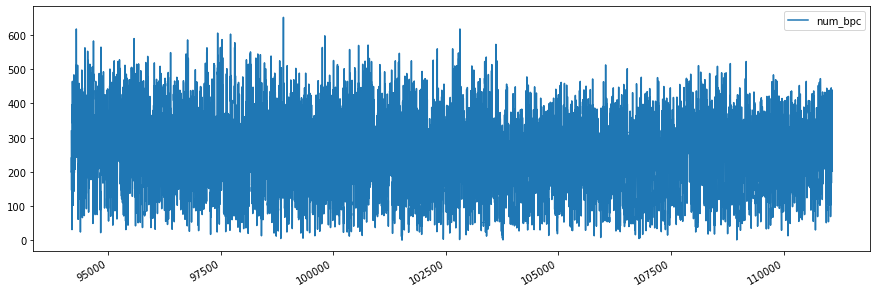

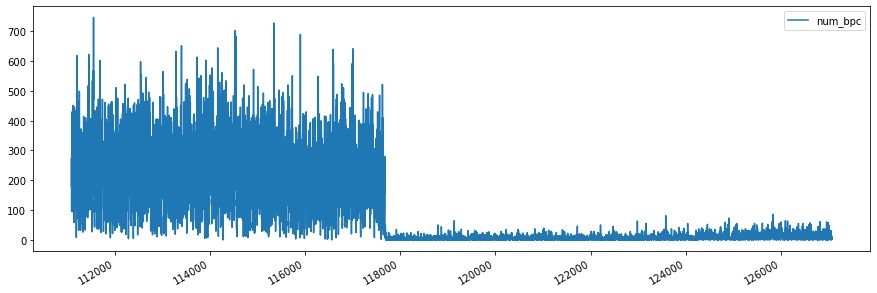

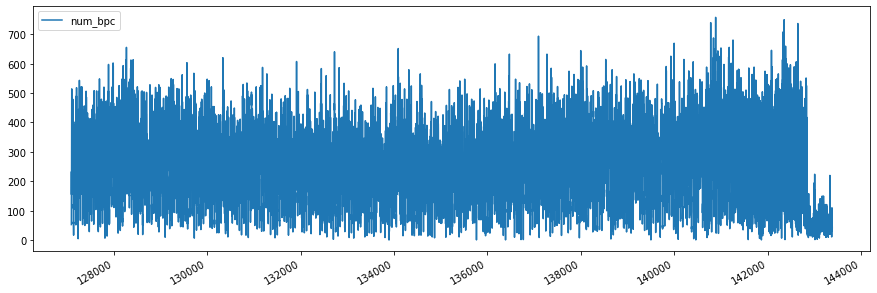

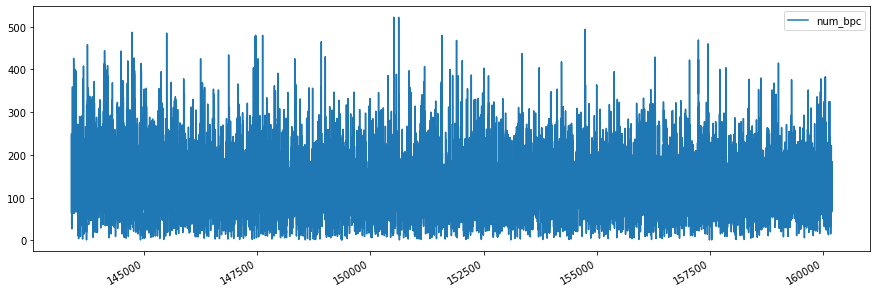

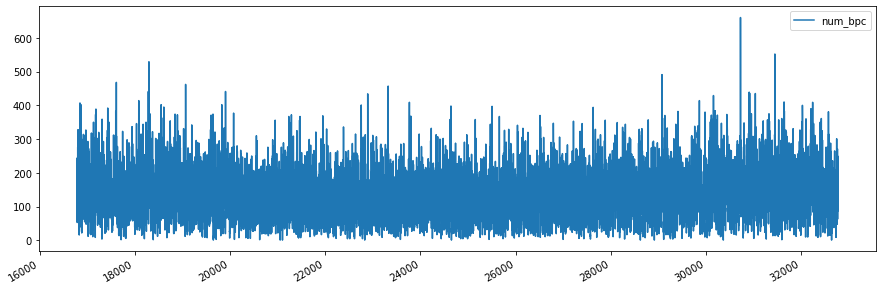

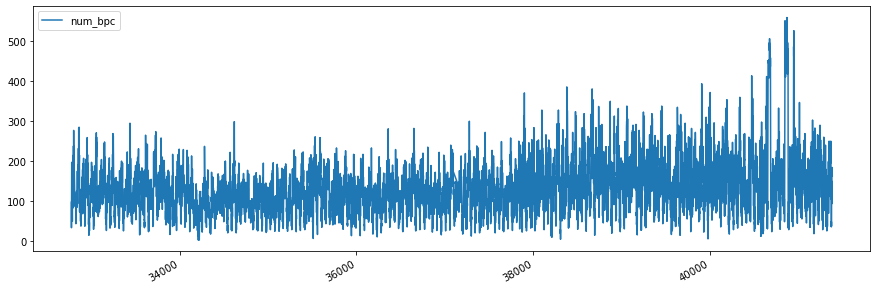

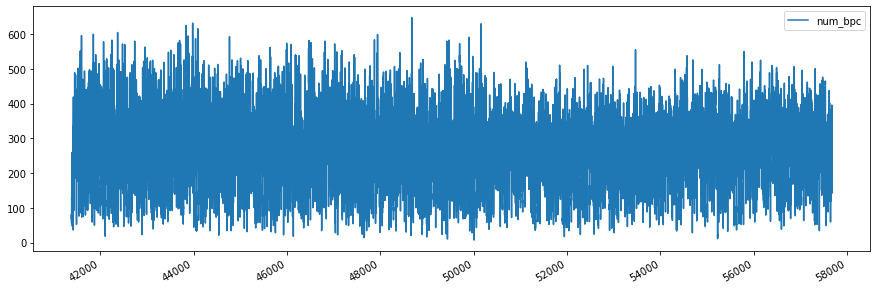

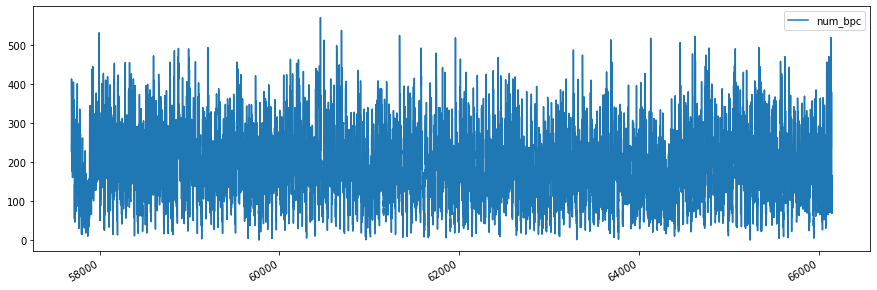

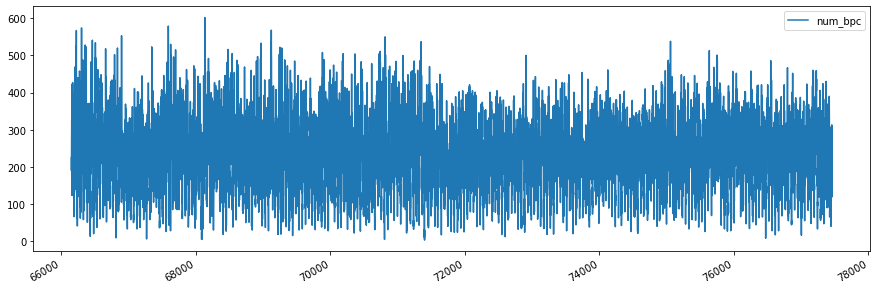

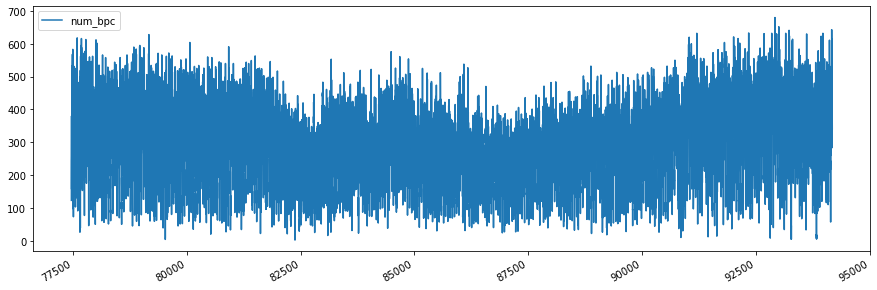

In [44]:
df_grouped = df.groupby(['zone'])
df_grouped.plot(figsize=(15,5), subplots=True)